<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/Practica_1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 1
## Objetivo General
Manipulación independiente de la luminancia y saturación de una imagen
## Objetivos Especificos
*   Conocer las librerías imageio, numpy y matplotlib.pyplot 
*   Conversión de espacios RGB y YIQ mediante matricez 

###1. Importación de librerías

In [41]:
from google.colab import drive
import imageio
import io
import numpy as np
import os
import matplotlib.pyplot as plt

###2. Incluiremos Drive en el trabajo
Incluido el drive en el trabajo procedemos a leer la imagen

In [42]:
#drive.mount('/content/gdrive')
image=imageio.imread('loro.jpg')

###3. Interacción con el usuario
Utilizaremos un botón scroll para que el usuario seleccione el valor de ØY y/o ßIQ, siendo:

*   ØY: coeficiente de luminancia
*   ßIQ: coeficiente de saturación



In [43]:
ØY = 1 #@param {type:"slider", min:-2, max:2, step:0.1}
ßIQ = -2 #@param {type:"slider", min:-2, max:2, step:0.1}

###4. Conversión de espacios
Utilizaremos 3 matrices para la transformación entre el espacio RGB y el IAQ, la tercera matriz almacenará los coeficientes de luminancia y saturación elegido por el usuario

In [44]:
matrixYIQ=np.array([[0.299,0.587,0.144],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
matrixRGB=np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
matrixcoeff=np.array([[ØY,0,0],[0,ßIQ,0],[0,0,ßIQ]])

###5. Visualización
Para graficar las imagenes correspondientes se hara uso de la librería matplotlib.pyplot y mostrando:


*   1. Imagen Original 
*   2. Imagen normalizada [0,1] en el espacio RGB
*   3. Imagen transformada al espacio YIQ
*   4. Imagen resultante producto de la manipulación de la luminancia y saturación



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


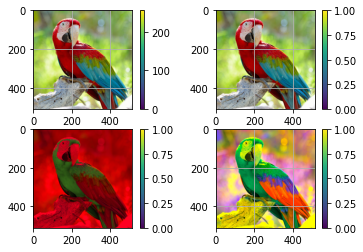

In [45]:
#print (image) Permite visualizar la matriz de la imagen
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.colorbar()
plt.grid()


#Normalización de valores RGB
imagecopy=image/255
#print (imagecopy) Permite visualizar la matriz de la imagen
plt.subplot(2, 2, 2)
plt.imshow(imagecopy)
plt.colorbar()
plt.grid()


#Multiplicación de la matriz YIQ por los coeficientes de luminancia y saturación
YIQ=np.dot(imagecopy,matrixYIQ)
#print (YIQ) Permite visualizar la matriz de la imagen
plt.subplot(2, 2, 3)
plt.imshow(YIQ,vmax=1, vmin=0)
plt.colorbar()


#Cambio de luminancia y/o saturación de la imagen
imagecopy1=np.copy(YIQ)
YIQ2=np.dot(imagecopy1,matrixcoeff)
#print(YIQ2) Permite visualizar la matriz de la imagen

#Transformación de l espacio YIQ a RGB
imagecopy2=np.dot(YIQ2,matrixRGB)
#print(loro4) Visualización de la matriz
plt.subplot(2, 2, 4)
plt.imshow(imagecopy2)
plt.colorbar()
plt.grid()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


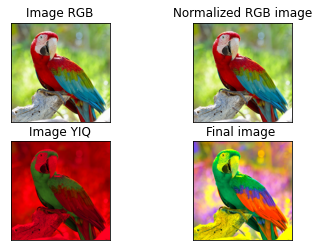

In [46]:
titles=['Image RGB', 'Normalized RGB image', 'Image YIQ', 'Final image ']
images=[image, imagecopy,YIQ, imagecopy2]
for i in range (4):
  plt.subplot(2,2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.show()